In this Kernel I have applied Artifical Neural Network for hand digit recognition, with no hidden layer  

In [10]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt 
import numpy as np

In [11]:
(X_train, y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data() 

11501568/11490434 [==============================] - 1s 0us/step


In [12]:
len(X_train)

60000

In [14]:
len(X_test)

10000

In [17]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

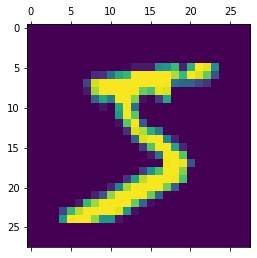

In [36]:
plt.matshow(X_train[0])

Scaling our features 

In [30]:
X_train = X_train/255
X_test = X_test/255

Flatten the 28*28 image into 1D column using reshape 

In [31]:
X_train_flatten = X_train.reshape(len(X_train), 28*28) 
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [32]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flatten, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4726 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3040 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2838 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2729 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9257


In [33]:
y_predict = model.predict(X_test_flatten)

In [34]:
y_predict[0]

array([2.33311653e-02, 5.04075501e-07, 5.46257198e-02, 9.53452885e-01,
       3.06352973e-03, 1.24396324e-01, 2.12649979e-06, 9.99813497e-01,
       1.35388702e-01, 6.00542188e-01], dtype=float32)

In [35]:
np.argmax(y_predict[0])

7

In [41]:
y_prediction = [np.argmax(i) for i in y_predict]

In [43]:
tf.math.confusion_matrix(labels = Y_test, predictions =  y_prediction)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    6,    2,    3,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [  11,   10,  904,   14,   10,    4,   13,    9,   54,    3],
       [   5,    0,   17,  897,    1,   35,    4,   10,   35,    6],
       [   1,    1,    2,    1,  920,    0,   13,    3,   11,   30],
       [   9,    2,    1,   21,   10,  789,   17,    4,   33,    6],
       [  10,    3,    3,    1,    7,   11,  918,    2,    3,    0],
       [   2,    8,   20,    6,    9,    1,    0,  945,    4,   33],
       [   5,    6,    5,   14,    9,   23,   10,    6,  890,    6],
       [   9,    7,    1,    9,   28,    6,    0,   17,   14,  918]])>

In [44]:
def sigmoid(X):
    sig = 1/(1 + np.exp(-X))
    return sig

In [45]:
def hypothesis_function(X,W):
    hf = np.dot(W,X.T)
    return sig(hf);

In [49]:
def lossfunction(y_test, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(epsilon,i) for i in y_predicted]
    y_predicted_new = [min(y_predicted, 1-epsilon)  for i in y_predicted]
    loss = 1/n *(np.sum(y_test,np.log(y_predicted)) + np.sum((1 - y_test),np.log(1 - y_predicted)))
    return loss

In [50]:
def gradient_descent(X, W, learning_rate= 0.05):
    
    w1 = 0
    w2 = 0
    b = 0
    n = len(X)
    
    